In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

from statsmodels.graphics.gofplots import qqplot
import pylab
import scipy.stats as stats

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# NOMOR 1

In [ ]:
mydata = {'penjualan': [72,76,78,70,68,80,82,65,62,90],
        'jumlah iklan di radio dan tv': [12,11,15,10,11,16,14,8,8,18],
        'jumlah endorse selebgram': [5,8,6,5,3,9,12,4,3,10]
        }

df = pd.DataFrame(mydata, columns = ['penjualan', 'jumlah iklan di radio dan tv', 'jumlah endorse selebgram'])

In [ ]:
df.head()

,penjualan,jumlah iklan di radio dan tv,jumlah endorse selebgram
0,72,12,5
1,76,11,8
2,78,15,6
3,70,10,5
4,68,11,3


## **inisiasi variabel**

In [ ]:
x = df[['jumlah iklan di radio dan tv', 'jumlah endorse selebgram']]
y = df['penjualan']

## **Membuat Model**

In [ ]:
#summary
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              penjualan   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     86.34
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.17e-05
Time:                        16:03:09   Log-Likelihood:                -18.882
No. Observations:                  10   AIC:                             43.76
Df Residuals:                       7   BIC:                             44.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## **Persamaan** **regresi**

$\hat{Y} = 47.16 + 1.599 X_1 + 1.149 X_2$

Berdasarkan persamaan diatas:

- Didapatkan koefisien $X_1$ dan $X_2$ pada model regresi adalah positif, artinya terdapat hubungan yang positif pada jumlah iklan di tv & radio dan jumlah iklan di selebgram terhadap jumlah penjualan.
- Kesimpulan : apabila jumlah iklan pada tv & radio dan selebgram meningkat, maka penjualan juga akan meningkat.
- dengan intercept 47.16 kita dapat menyimpulkan bahwa penjualan tanpa iklan pada tv dan radio serta tanpa endorse selebgram, akan tetap terjual sebesar 47.16.
- peningkatan nilai variabel (X1) iklan di radio dan tv sebesar tiap 1 satuan akan meningkatkan penjualan sebesar 1.599
- peningkatan nilai variabel (X2) endorse selebgram sebesar tiap 1 satuan akan meningkatkan penjualan sebesar 1.149

## **Nilai $R^2$**

Berdasarkan model yang digunakan diketahui bahwa nilai $R^2$ yang dihasilkan adalah sebesar 96,1% yang artinya variabel independen pada model dapat menjelaskan variabel dependen dengan sangat baik. Sedangkan sisanya dipengaruhi oleh faktor lain di luar model.

## **Uji Serentak**

Uji F digunakan untuk melihat apakah model secara keseluruhan layak atau tidak. Juga sering disebut Goodness of Fit.

$H_{0}: \beta_{1} = \beta_{2} = 0$

$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2$

In [ ]:
print('F-hitung = ', result.fvalue) #F hitung
print('P-value = ', result.f_pvalue) #P-value

F-hitung =  86.33503537237802
P-value =  1.1672880895886404e-05


In [ ]:
alpha = 0.05

#Daerah penolakan dan keputusan
if result.f_pvalue > alpha:
	print('dikarenakan P value > alfa maka gagal tolak H0, artinya tidak ada variabel independen yang mempengaruhi variabel Y (penjualan)')
else:
	print('dikarenakan P value < alfa maka tolak h0, artinya minimal ada satu variabel independen yang mempengaruhi variabel Y (penjualan)')

dikarenakan P value < alfa maka tolak h0, artinya minimal ada satu variabel independen yang mempengaruhi variabel Y (penjualan)


## **Uji Parsial**

Uji t adalah untuk menguji apakah satu variabel bebas mempunyai pengaruh yang signifikan terhadap variabel terikat atau tidak.

Untuk $\beta_{1}$

$H_{0}: \beta_{1} = 0$

$H_{1}: \beta_{1} \neq 0$

Untuk $\beta_{2}$

$H_{0}: \beta_{2} = 0$

$H_{1}: \beta_{2} \neq 0$

In [ ]:
print('t-hitung = ', result.tvalues) #F hitung
print('P-value = ', result.pvalues) #P-value

t-hitung =  const                           19.091915
jumlah iklan di radio dan tv     5.691283
jumlah endorse selebgram         3.763316
dtype: float64
P-value =  const                           2.692292e-07
jumlah iklan di radio dan tv    7.420101e-04
jumlah endorse selebgram        7.044246e-03
dtype: float64


- Karena P-value untuk kedua parameter signifikan yaitu < alfa (0.05), maka dapat diputuskan **Tolak H0**.
- Sehingga, dapat disimpulkan ada relasi linier antara Y dengan X1 serta Y dengan X2.

-------------------------------------------------------------------------------

# NOMOR 2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


* Cement: cement
* Blast furnace Slag: Slag Produced in Blast Furnace
* Fly Ash: Amount of ash produced
* Water: Amount of water required
* Superplasticizer: Rigidity of cement adter drying
* Coarse Aggregate: The coarse nature of the cement particles
* Fine Aggregate: Fineness of the cement
* Age: Age or time before it needs repairing
* Strength: Strength of concrete per kilo newton

## **inisiasi variabel**

In [ ]:
x = df.drop(['Strength'], axis = 1)
y = df['Strength']

## **Membuat Model**

In [ ]:
#summary
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 02 May 2024   Prob (F-statistic):          6.29e-206
Time:                        16:06:38   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -23.3312     26

## **Persamaan Regresi**

$\hat{Y} = -23.33 + 0.1198 X_1 + 0.1039 X_2 + 0.0879X_3 -0.1499X_4 + 0.2922X_5 + 0.181X_6 + 0.0202 X_7 + 0.1142X_8$

- Didapatkan koefisien $X_1$ ,$X_2$, $X_3$, $X_5$, $X_6$, $X_7$, dan $X_8$ pada model regresi adalah positif, artinya terdapat hubungan yang positif pada cement, Blast furnace Slag, Fly Ash, Superplasticizer, Coarse Aggregate, Fine Aggregate, dan Age dengan Strength
- Didapatkan juga koefisien $X_4$ pada model regresi adalah negatif, artinya terdapat hubungan negatif antara air dengan Strength
- Kesimpulan :
  - jika jumlah cement, Blast furnace Slag, Fly Ash, Superplasticizer, Coarse Aggregate, Fine Aggregate, dan Age meningkat -> maka Strength meningkat
  - jika jumlah air meningkat -> maka Strength menurun
- dari intercept -23.3312 dapat disimpulkan kekuatan beton (Strength) jika tanpa ditambahkan cement, Blast furnace Slag, Fly Ash, Superplasticizer, Water, Coarse Aggregate, Fine Aggregate, dan Age.
- peningkatan nilai variabel (X1) Cement sebesar tiap 1 satuan akan meningkatkan kekuatan beton sebesar 0.1198
- peningkatan nilai variabel (X2) Blast furnace Slag sebesar tiap 1 satuan akan meningkatkan kekuatan beton sebesar 0.1039
- peningkatan nilai variabel (X3) Fly Ash sebesar tiap 1 satuan akan meningkatkan kekuatan beton sebesar 0.0879
- peningkatan nilai variabel (X4) Water sebesar tiap 1 satuan akan **menurunkan** kekuatan beton sebesar 0.1499
- peningkatan nilai variabel (X5) Superplasticizer sebesar tiap 1 satuan akan meningkatkan kekuatan beton sebesar 0.2922
- peningkatan nilai variabel (X6) Coarse Aggregate sebesar tiap 1 satuan akan meningkatkan kekuatan beton sebesar 0.181
- peningkatan nilai variabel (X7) Fine Aggregate sebesar tiap 1 satuan akan meningkatkan kekuatan beton sebesar 0.0202
- peningkatan nilai variabel (X8) Age sebesar tiap 1 satuan akan meningkatkan kekuatan beton sebesar 0.1142

## **Nilai $R^2$**

Berdasarkan model yang digunakan diketahui bahwa nilai $R^2$ yang dihasilkan adalah sebesar 61.6% yang artinya variabel independen pada model dapat menjelaskan variabel dependen dengan cukup baik. Sedangkan sisanya dipengaruhi oleh faktor lain di luar model.

## **Uji Serentak**

Uji F digunakan untuk melihat apakah model secara keseluruhan layak atau tidak. Juga sering disebut Goodness of Fit.

$H_{0}: \beta_{1} = \beta_{2} = 0$

$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2,3,4,5,6,7,8$

In [ ]:
print('F-hitung = ', result.fvalue) #F hitung
print('P-value = ', result.f_pvalue) #P-value

F-hitung =  204.31673165077282
P-value =  6.285977820306508e-206


In [ ]:
alpha = 0.05

#Daerah penolakan dan keputusan
if result.f_pvalue > alpha:
	print('dikarenakan P value > alfa maka Gagal Tolak H0, artinya tidak ada relasi linier antara Y dan X')
else:
	print('dikarenakan P value < alfa maka Tolak H0, artinya ada relasi linier antara Y dan X')

dikarenakan P value < alfa maka Tolak H0, artinya ada relasi linier antara Y dan X


## **Uji Parsial**

Uji t adalah untuk menguji apakah satu variabel bebas mempunyai pengaruh yang signifikan terhadap variabel terikat atau tidak.

Untuk $\beta_{i}$

$H_{0}: \beta_{i} = 0$

$H_{1}: \beta_{i} \neq 0$ $i=1,2,3,4,5,6,7,8$

In [ ]:
result.pvalues #P-value

const                 3.803719e-01
Cement                1.897989e-41
Blast Furnace Slag    1.598993e-23
Fly Ash               5.019648e-12
Water                 2.008798e-04
Superplasticizer      1.810241e-03
Coarse Aggregate      5.442481e-02
Fine Aggregate        5.949075e-02
Age                   5.782491e-82
dtype: float64

In [ ]:
j = 1
for i in result.pvalues[1:]:
  if i < alpha:
    print(result.pvalues.index[j], 'berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)')
  else :
    print(result.pvalues.index[j], 'tidak berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)')
  j = j+1

Cement berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)
Blast Furnace Slag berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)
Fly Ash berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)
Water berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)
Superplasticizer berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)
Coarse Aggregate tidak berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)
Fine Aggregate tidak berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)
Age berpengaruh signifikan terhadap variabel respon (Kekuatan Beton)


-----------------------------------------

# NOMOR 3

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/marketingfix.csv')
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


## **inisiasi variabel**

In [ ]:
x = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

## **Membuat Model**

In [ ]:
#summary
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.58e-96
Time:                        16:40:40   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0

## **Persamaan Regresi**

$\hat{Y} = 3.5267 + 0.0458 X_1 + 0.1885 X_2 - 0. 0010 X_3 $

- Didapatkan koefisien $X_1$ dan $X_2$ pada model regresi adalah positif, artinya terdapat hubungan yang positif pada youtube dan facebook terhadap sales.
- Didapatkan juga koefisien $X_3$ pada model regresi adalah negatif, artinya terdapat hubungan negatif antara newspaper terhadap sales
- Kesimpulan :
  - jika jumlah uang yang dikeluarkan di youtube dan facebook meningkat -> maka sales (penjualan) meningkat
  - jika jumlah uang yang dikeluarkan di newspaper meningkat -> maka sales (penjualanan) menurun
- dari intercept 3.5267 dapat disimpulkan nilai pemasaran jika tidak mengeluarkan uang untuk youtube, facebook, dan newspaper.
- peningkatan nilai variabel (X1) Cement sebesar tiap 1 satuan akan meningkatkan sales (Penjualan) sebesar 0.0458
- peningkatan nilai variabel (X2) Blast furnace Slag sebesar tiap 1 satuan akan meningkatkan sales (Penjualan) sebesar 0.1885
- peningkatan nilai variabel (X3) Fly Ash sebesar tiap 1 satuan akan **menurunkan** sales (Penjualan) sebesar 0.001

  ## **Nilai $R^2$**
  
  Berdasarkan model yang digunakan diketahui bahwa nilai $R^2$ yang dihasilkan adalah sebesar 89,7% yang artinya variabel independen pada model dapat menjelaskan variabel dependen dengan sangat baik. Sedangkan sisanya dipengaruhi oleh faktor lain di luar model.

## **UJI SERENTAK**

Uji F digunakan untuk melihat apakah model secara keseluruhan layak atau tidak. Juga sering disebut Goodness of Fit.

$H_{0}: \beta_{1} = \beta_{2} = 0$

$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2,3$

In [ ]:
print ("F hitung =",result.fvalue)
print ("p-value =", result.f_pvalue)

alpha = 0.05

F hitung = 570.2707036590941
p-value = 1.5752272560924787e-96


In [ ]:
#Daerah penolakan dan keputusan
if result.f_pvalue > alpha:
	print('dikarenakan P value > alfa maka gagal tolak H0, artinya tidak ada relasi linier antara Y dan X')
else:
	print('dikarenakan P value < alfa maka Tolak H0 ada relasi linier antara Y dan X')

dikarenakan P value < alfa maka Tolak H0 ada relasi linier antara Y dan X


## **UJI PARSIAL**

Uji t adalah untuk menguji apakah satu variabel bebas mempunyai pengaruh yang signifikan terhadap variabel terikat atau tidak.

Untuk $\beta_{i}$

$H_{0}: \beta_{i} = 0$

$H_{1}: \beta_{i} \neq 0$ $i=1,2,3$

In [ ]:
result.pvalues #P-value

const        1.267295e-17
youtube      1.509960e-81
facebook     1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [ ]:
j=1
for i in result.pvalues[1:]:
  if i < alpha:
    print(result.pvalues.index[j], 'berpengaruh signifikan terhadap variabel respon (Pemasaran)')
  else :
    print(result.pvalues.index[j], 'tidak berpengaruh signifikan terhadap variabel respon (Pemasaran)')
  j=j+1

youtube berpengaruh signifikan terhadap variabel respon (Pemasaran)
facebook berpengaruh signifikan terhadap variabel respon (Pemasaran)
newspaper tidak berpengaruh signifikan terhadap variabel respon (Pemasaran)


## **Plot Residual**

In [ ]:
# Residuals model regresi linier berganda
residual = result.resid
residual

0      1.891231
1     -2.325426
2     -3.609205
3      1.082605
4     -0.346406
         ...   
195    2.675589
196    1.841625
197    0.016895
198    2.079214
199   -2.127835
Length: 200, dtype: float64

<Axes: >

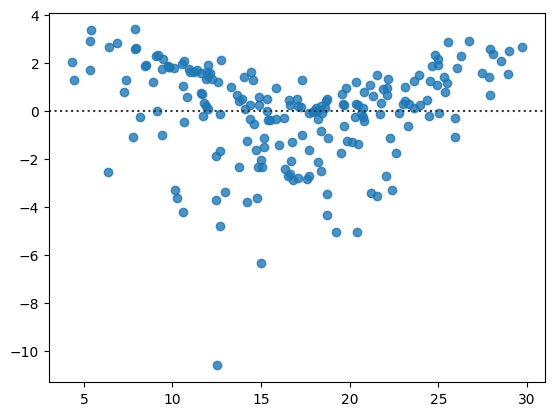

In [ ]:
#Grafik Residual
sns.residplot(x=result.fittedvalues, y=residual)

### **Interpretasi**
Karena persebaran titik titik residual mendekati garis 0, sehingga dapat disimpulkan perlakuan model sudah baik dan memiliki error yang kecil

--------------------------------------------------------------------------------

# NOMOR 4

In [ ]:
mydata = {'Konsentrasi Nitrat': [1.45,1.93,0.81,0.61,1.55,0.95,0.45,1.14,0.74,0.98,1.41,0.81,0.89,0.68,1.39,1.53,0.91,1.49,1.38,1.73,1.11,1.68,0.66,0.69,1.98],
        'Pemuatan Nitrat': [0.58,0.86,0.29,0.20,0.56,0.28,0.08,0.41,0.22,0.35,0.59,0.22,0.26,0.12,0.65,0.7,0.3,0.7,0.39,0.72,0.45,0.81,0.04,0.2,0.95],
        'Limpasan Air Tawar': [0.71,0.13,0.79,0.2,0.56,0.92,0.01,0.6,0.7,0.73,0.13,0.96,0.27,0.21,0.88,0.3,0.15,0.09,0.17,0.25,0.3,0.32,0.82,0.98,0.00]
        }

df = pd.DataFrame(mydata, columns = ['Konsentrasi Nitrat', 'Pemuatan Nitrat', 'Limpasan Air Tawar'])
df.head()

,Konsentrasi Nitrat,Pemuatan Nitrat,Limpasan Air Tawar
0,1.45,0.58,0.71
1,1.93,0.86,0.13
2,0.81,0.29,0.79
3,0.61,0.20,0.20
4,1.55,0.56,0.56


## **Inisiasi Variabel**

In [ ]:
x = df[['Pemuatan Nitrat', 'Limpasan Air Tawar']]
y = df['Konsentrasi Nitrat']

## **Membuat Model**

In [ ]:
#summary
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Konsentrasi Nitrat   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     172.0
Date:                Thu, 02 May 2024   Prob (F-statistic):           3.70e-14
Time:                        16:34:02   Log-Likelihood:                 20.696
No. Observations:                  25   AIC:                            -35.39
Df Residuals:                      22   BIC:                            -31.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4335      0

## **Persamaan Regresi**

$\hat{Y} = 0.4335 + 1.6530 X_1 + 0.0039 X_2$

- Didapatkan koefisien $X_1$ dan $X_2$ pada model regresi adalah positif, artinya terdapat hubungan yang positif pada Pemuatan Nitrat dan Limpasan Air Tawar terhadap Konsentrasi Nitrat.
- Kesimpulan : Jika Pemuatan Nitrat dan Limpasan Air tawar meningkat maka Konsentrasi Nitrat akan ikut meningkat
- dari intercept 0.4335 dapat disimpulkan besar konsentrasi Nitrat jika tidak dipengaruhi Pemuatan Nitrat dan Limpasan Air Tawar.
- peningkatan nilai variabel (X1) Pemuatan Nitrat sebesar tiap 1 satuan akan **meningkatkan** Konsentrasi Nitrat sebesar 1.6530
- peningkatan nilai variabel (X2) Limpasan Air Tawar sebesar tiap 1 satuan akan **meningkatkan** Konsentrasi Nitrat sebesar 0.0039

 ## **Nilai $R^2$**

  Berdasarkan model yang digunakan diketahui bahwa nilai $R^2$ yang dihasilkan adalah sebesar 94% yang artinya variabel independen pada model dapat menjelaskan variabel dependen dengan sangat baik. Sedangkan sisanya dipengaruhi oleh faktor lain di luar model.

## **Uji Serentak**

Uji F digunakan untuk melihat apakah model secara keseluruhan layak atau tidak. Juga sering disebut Goodness of Fit.

$H_{0}: \beta_{1} = \beta_{2} = 0$

$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2$

In [ ]:
print ("F hitung =",result.fvalue)
print ("p-value =", result.f_pvalue)

alpha = 0.05

F hitung = 172.01128173602032
p-value = 3.698818725171456e-14


In [ ]:
#Daerah penolakan dan keputusan
if result.f_pvalue > alpha:
	print('dikarenakan P value > alfa maka gagal tolak H0, artinya tidak ada relasi linier antara Y dan X')
else:
	print('dikarenakan P value < alfa maka Tolak H0, artinya ada relasi linier antara Y dan X')

dikarenakan P value < alfa maka Tolak H0, artinya ada relasi linier antara Y dan X


## **Uji Parsial**
Uji t adalah untuk menguji apakah satu variabel bebas mempunyai pengaruh yang signifikan terhadap variabel terikat atau tidak.

Untuk $\beta_{i}$

$H_{0}: \beta_{i} = 0$

$H_{1}: \beta_{i} \neq 0$ $i=1,2$

In [ ]:
result.pvalues #P-value

const                 1.313239e-06
Pemuatan Nitrat       2.525004e-14
Limpasan Air Tawar    9.584457e-01
dtype: float64

In [ ]:
j=1
for i in result.pvalues[1:]:
  if i < alpha:
    print(result.pvalues.index[j], 'berpengaruh signifikan terhadap variabel respon (Konsentrasi Nitrat)')
  else :
    print(result.pvalues.index[j], 'tidak berpengaruh signifikan terhadap variabel respon (Konsentrasi Nitrat)')
  j=j+1

Pemuatan Nitrat berpengaruh signifikan terhadap variabel respon (Konsentrasi Nitrat)
Limpasan Air Tawar tidak berpengaruh signifikan terhadap variabel respon (Konsentrasi Nitrat)


## **Plot Residual**


In [ ]:
# Residuals model regresi linier berganda
residual = result.resid
residual

0     0.054916
1     0.074366
2    -0.106032
3    -0.154935
4     0.188567
5     0.049985
6    -0.115826
7     0.026359
8    -0.059967
9    -0.034975
10    0.000674
11    0.009007
12    0.025609
13    0.047265
14   -0.121464
15   -0.061826
16   -0.020037
17   -0.100998
18    0.301115
19    0.105311
20   -0.068578
21   -0.093734
22    0.157098
23   -0.078012
24   -0.023891
dtype: float64

<Axes: >

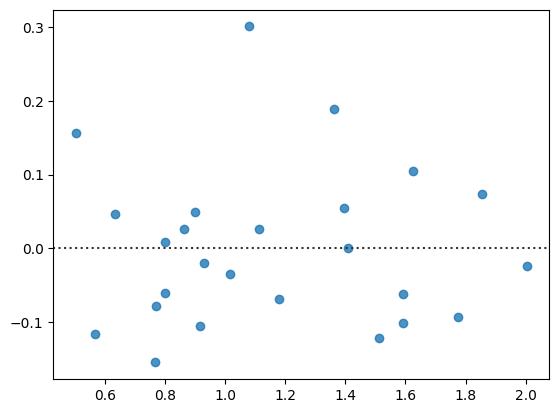

In [ ]:
#Grafik Residual
sns.residplot(x=result.fittedvalues, y=residual)

### **Interpretasi**
Karena persebaran titik titik residual mendekati garis 0, sehingga dapat disimpulkan perlakuan model sudah baik dan memiliki error yang kecil